In [1]:
import sklearn as sl
import warnings

warnings.filterwarnings("ignore")

### Business Problem Definition

Let's create a predictive model that is able to predict whether or not a person can develop diabetes. For this, we will use historical patient data, available in the following dataset: http://archive.ics.uci.edu/ml/datasets/diabetes

This dataset describes the medical records among Pima Inidians patients and each record is marked whether the patient developed diabetes or not.

### Attribute information

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

### Data Extraction and Loading

In [2]:
import pandas as pd

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(file, names = columns)

### Exploratory Data Analysis

### *Descriptive Statistics*

In [3]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Large datasets can take a long time to train the algorithm, and small ones may not have enough records to train the same.<br />
Many columns in your file can cause performance problems to the algorithm due to the high dimensionality.

The best solution will depend on each case. But remember: train your model in a subset of your larger dataset and then apply the model to new data.

**Dataset Dimensions**

In [4]:
data.shape

(768, 9)

**Attribute Data Type**

In [5]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Sometimes it may be necessary convert data types, for example, when columns with integers represents categorical variables or ordinary values.

**Statistical Summary**

In [6]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Class Distribution**

In [7]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In classification problems it may be necessary to balance the classes.<br />
Unbalanced classes (ie, greater volume of one of the class types) are common and need to be addressed during the pre-processing phase.<br /> We can see in the previous cell that there is a clear disproportion between classes 0 (non-occurrence of diabetes) and 1 (occurrence of diabetes).

**Pearson's Correlation**

In [8]:
data.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The correlation is the relationship between 2 variables. The most common method for calculating correlation is the Pearson method, which assumes a normal data distribution.<br />Correlation range from -1 (negative correlation) to +1 (positive correlation). A correlation of 0 shows that there is no relationship between the variables.

Some algorithms, such as linear regression and logistic regression can present performance problems if there are highly correlated (collinear) attributes.

**Attribute Skew**

In [9]:
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

Skew (or symmetry) refers to the distribution of data, that is assumed to be normal or Gaussian (bell curve).<br />
Many Machine Learning algorithms assume that the data has a normal distribution. Knowing the symmetry of the data, we can handle the same and deliver to the algorithm what it expects to receive, increasing the accuracy of the predictive model.

### *Matplotlib Visualization*

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

**Univariate Histogram**

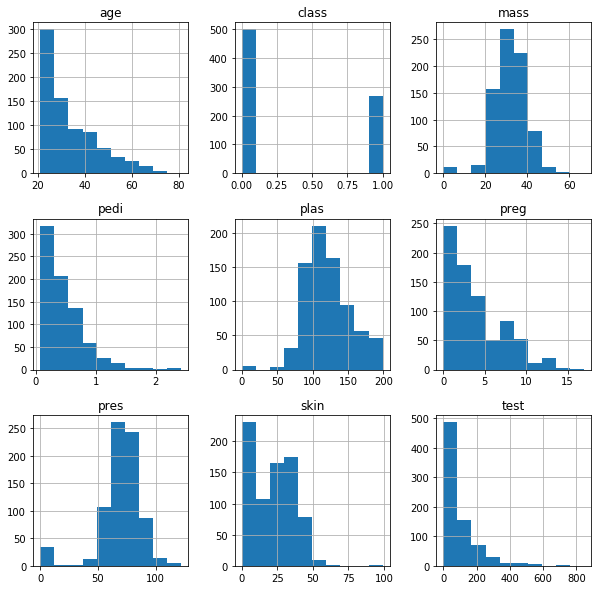

In [11]:
data.hist()
plt.show()

With the histogram we can quickly see the distribution of each attribute.<br />
Histograms group data into bins and provide a count of the number of observations in each bin. With the histogram, you can quickly check the symmetry of the data and whether it is in normal distribution or not. This will also help in identifying outliers.

We can see that the attributes age, pedi and test have an exponential distribution, and that the attributes mass and press have a normal distribution.

**Univariate Density Plot**

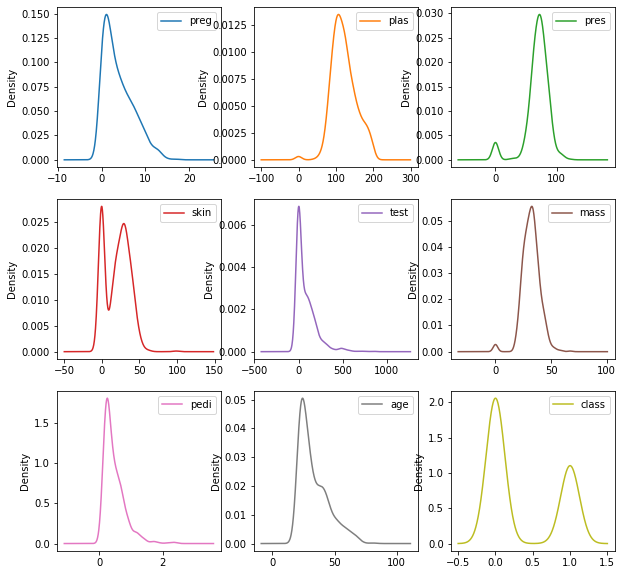

In [12]:
data.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False)
plt.show()

Density Plots are another way to visualize the distribution of data for each attribute.<br />
The plot is like a kind of abstract histogram with a smooth curve through the top of the bins of a histogram. It may be easier to identify the distribution of the data using a density plot.

**Box Plot**

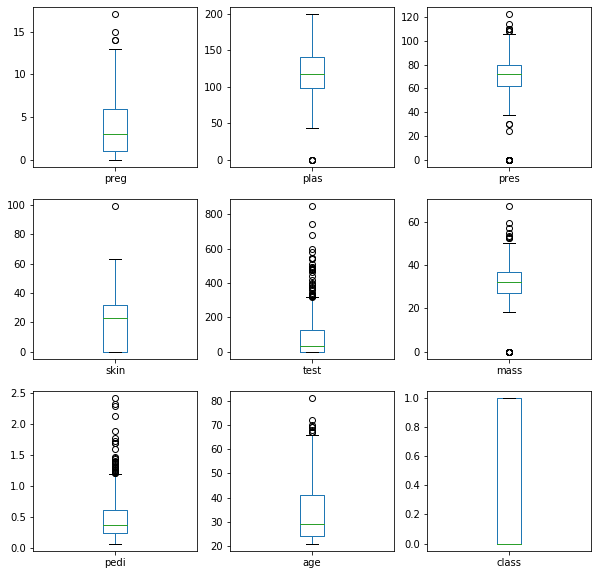

In [13]:
data.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

With boxplots we can also review the data distribution for each attribute<br />
The line in the center (green) is the median value (quartile 50%), the line below is the quartile 25% and the line above the quartile 75%.<br />
The boxplot helps to get an idea of the data dispersion and possible outliers.

We can see that the dispersion of the data is quite different among the attributes. The age, skin and test columns have a symmetry very close to smaller data values.

**Correlation Matrix (with variable names)**

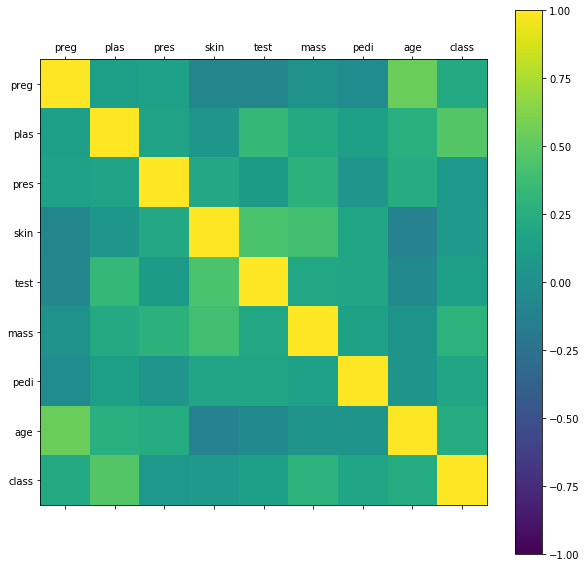

In [14]:
import numpy as np

correlations = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

**Generic Correlation Matrix (without variable names)**

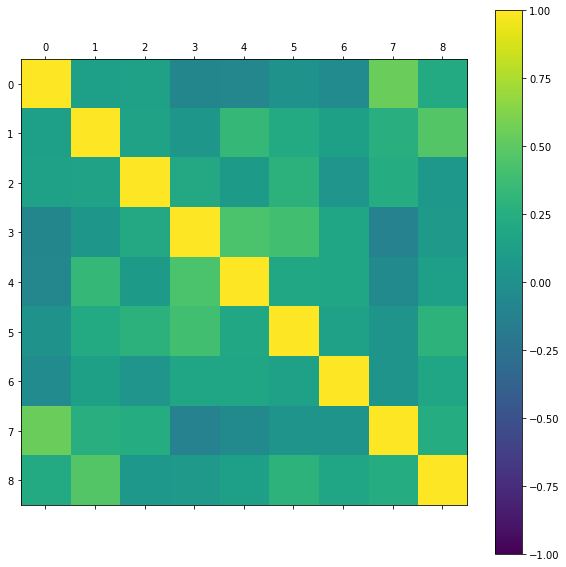

In [15]:
correlations = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

**Scatter Plot**

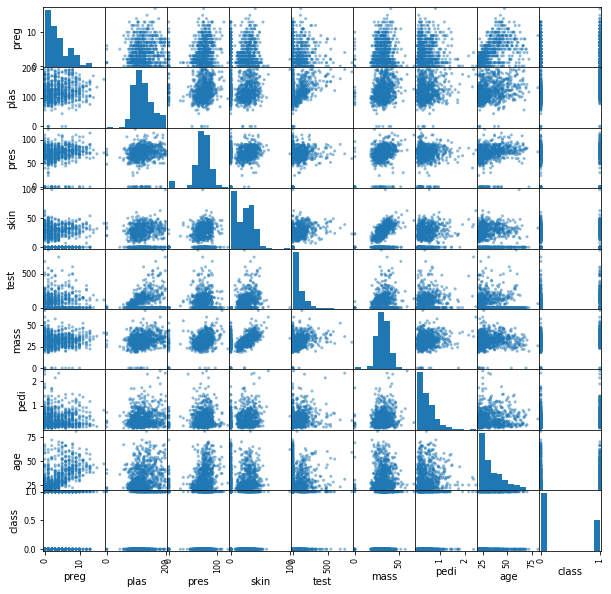

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()

A scatterplot shows the relationship between two variables as points in two dimensions, with an axis for each variable. We can create a scatterplot for each pair of variables in our dataset.<br />
Like the correlation matrix, the scatterplot matrix is symmetric.

### *Seaborn Visualization*

In [17]:
import seaborn as sns

In [18]:
data.describe

<bound method NDFrame.describe of      preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]>

**Pair Plot**

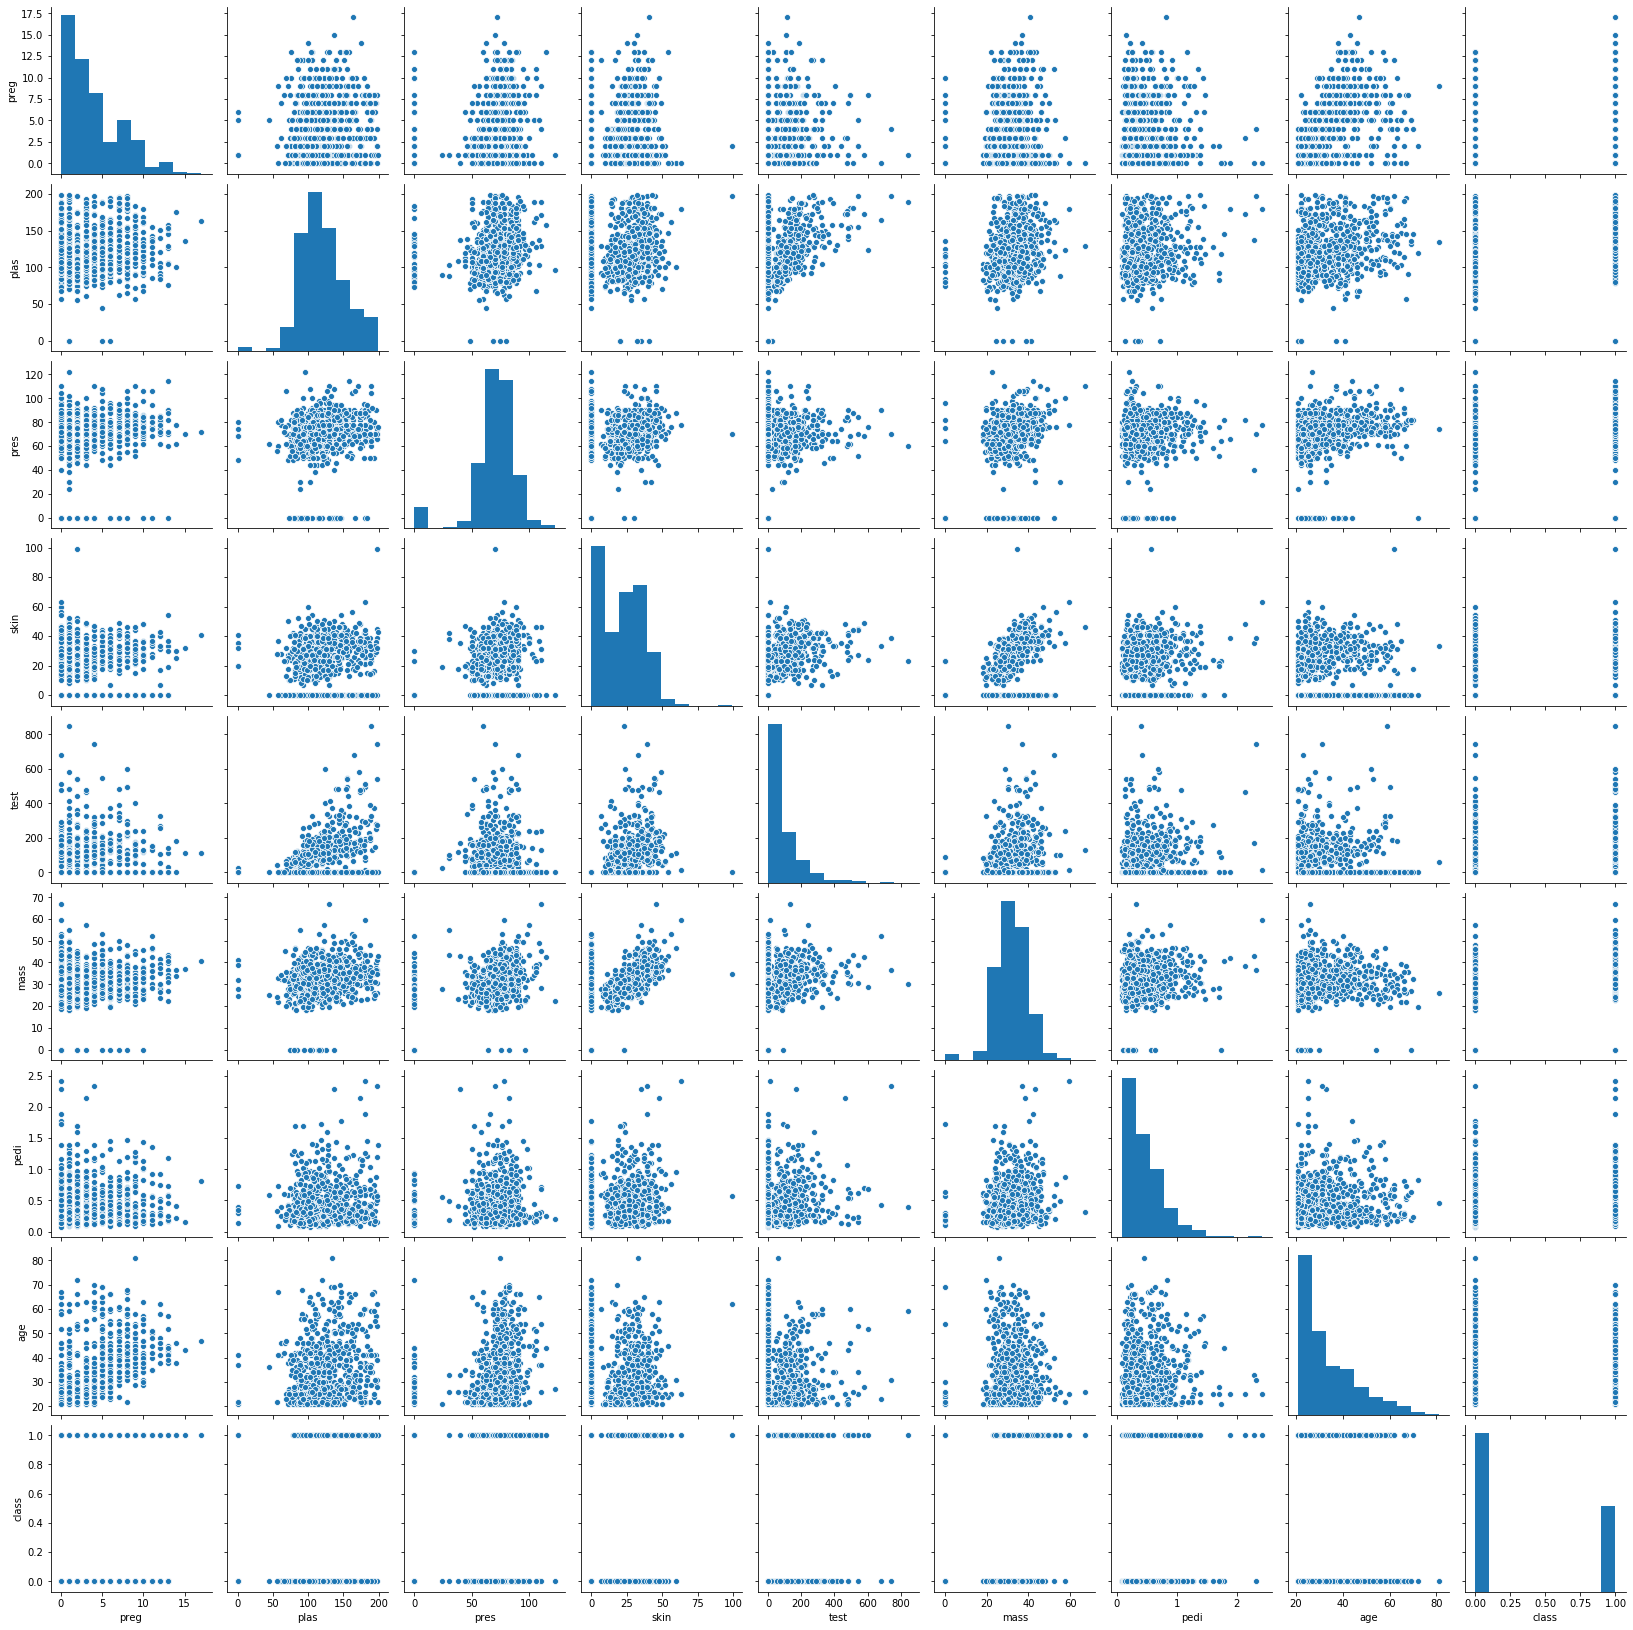

In [19]:
sns.pairplot(data);

**Boxplot with Vertical Orientation**

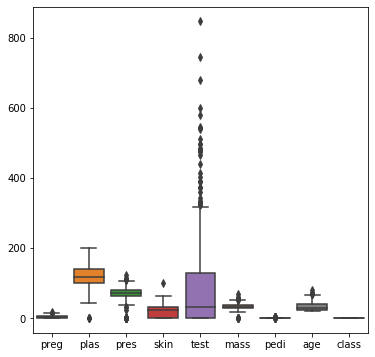

In [20]:
plt.figure(figsize = (6, 6))
sns.boxplot(data= data, orient = 'v');

**Cluster Map**

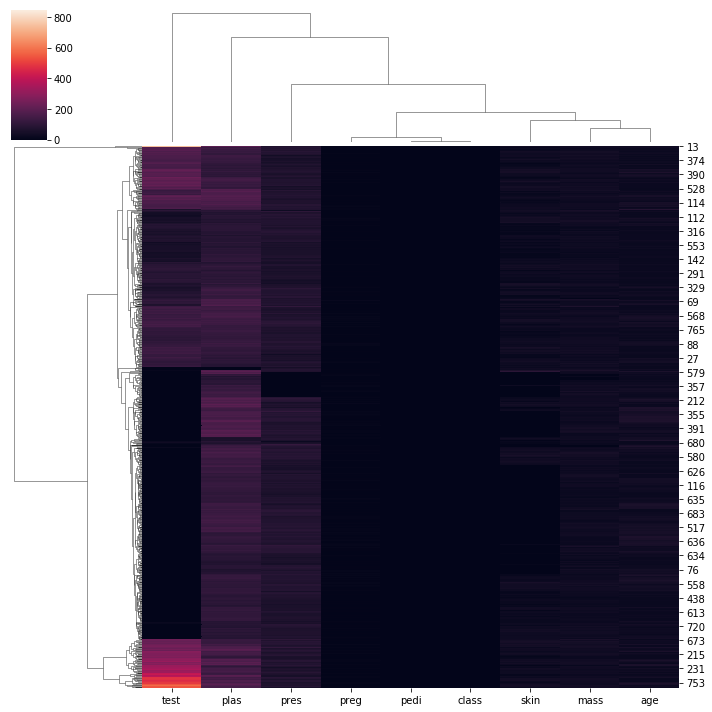

In [21]:
sns.clustermap(data);

**Dist Plot**

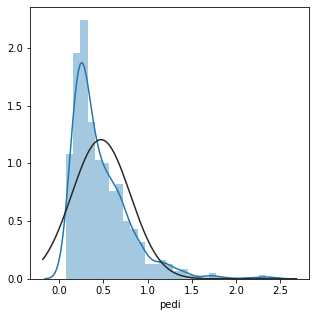

In [22]:
from scipy import stats

plt.figure(figsize = (5, 5))
sns.distplot(data.pedi, fit = stats.norm);

### Data Preparation for Machine Learning